### Plot Diff-in-Diff for Florida, Texas, and Washington

In [1]:
%load_ext lab_black
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [2]:
# load mortality rate data

fl_pre_policy_mortality = pd.read_csv(
    "./fl_pre_policy_mortality.csv",
    sep=",",
)
fl_post_policy_mortality = pd.read_csv(
    "./fl_post_policy_mortality.csv",
    sep=",",
)
tx_pre_policy_mortality = pd.read_csv(
    "./tx_pre_policy_mortality.csv",
    sep=",",
)
tx_post_policy_mortality = pd.read_csv(
    "./tx_post_policy_mortality.csv",
    sep=",",
)
wa_pre_policy_mortality = pd.read_csv(
    "./wa_pre_policy_mortality.csv",
    sep=",",
)
wa_post_policy_mortality = pd.read_csv(
    "./wa_post_policy_mortality.csv",
    sep=",",
)
avg_mortality_compare_to_fl = pd.read_csv(
    "./avg_mortality_compare_to_fl.csv",
    sep=",",
)
avg_mortality_compare_to_tx = pd.read_csv(
    "./avg_mortality_compare_to_tx.csv",
    sep=",",
)
avg_mortality_compare_to_wa = pd.read_csv(
    "./avg_mortality_compare_to_wa.csv",
    sep=",",
)

In [3]:
# concatenate pre and post mortality rate data

fl_mortality = pd.concat([fl_pre_policy_mortality, fl_post_policy_mortality])
tx_mortality = pd.concat([tx_pre_policy_mortality, tx_post_policy_mortality])
wa_mortality = pd.concat([wa_pre_policy_mortality, wa_post_policy_mortality])

In [4]:
# subset to dataframes with averaged mortality rate by year for each state

fl_mortality_avg = fl_mortality.groupby(["Year"], as_index=False)[
    "Mortality Rate"
].mean()
tx_mortality_avg = tx_mortality.groupby(["Year"], as_index=False)[
    "Mortality Rate"
].mean()
wa_mortality_avg = wa_mortality.groupby(["Year"], as_index=False)[
    "Mortality Rate"
].mean()

In [5]:
fl_mortality_avg

,Year,Mortality Rate
0,2003,0.000118
1,2004,0.000126
2,2005,0.000137
3,2006,0.000159
4,2007,0.000151
5,2008,0.000164
6,2009,0.000159
7,2010,0.000122
8,2011,0.000123
9,2012,0.000143


In [6]:
tx_mortality_avg

,Year,Mortality Rate
0,2003,0.000094
1,2004,0.000083
2,2005,0.000091
3,2006,0.000131
4,2007,0.000098
5,2008,0.000104
6,2009,0.000116
7,2010,0.000107
8,2011,0.000109
9,2012,0.000100


In [7]:
wa_mortality_avg

,Year,Mortality Rate
0,2003,0.000101
1,2004,0.000130
2,2005,0.000131
3,2006,0.000143
4,2007,0.000139
5,2008,0.000145
6,2009,0.000143
7,2010,0.000120
8,2011,0.000143
9,2012,0.000140


#### Florida

In [8]:
# seperate to pre and post policy periods for FL and comparison states (average of PA, AR, NM)

x_pre_fl = np.array(fl_mortality_avg[fl_mortality_avg["Year"] < 2010]["Year"])
y_pre_fl = np.array(fl_mortality_avg[fl_mortality_avg["Year"] < 2010]["Mortality Rate"])
x_post_fl = np.array(fl_mortality_avg[fl_mortality_avg["Year"] >= 2010]["Year"])
y_post_fl = np.array(
    fl_mortality_avg[fl_mortality_avg["Year"] >= 2010]["Mortality Rate"]
)

x_pre_comp = np.array(
    avg_mortality_compare_to_fl[avg_mortality_compare_to_fl["Year"] < 2010]["Year"]
)
y_pre_comp = np.array(
    avg_mortality_compare_to_fl[avg_mortality_compare_to_fl["Year"] < 2010][
        "Avg Mortality Rate"
    ]
)
x_post_comp = np.array(
    avg_mortality_compare_to_fl[avg_mortality_compare_to_fl["Year"] >= 2010]["Year"]
)
y_post_comp = np.array(
    avg_mortality_compare_to_fl[avg_mortality_compare_to_fl["Year"] >= 2010][
        "Avg Mortality Rate"
    ]
)

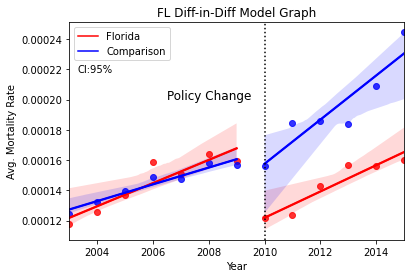

In [9]:
import warnings

warnings.filterwarnings("ignore")

fig, ax = plt.subplots()
# ax.plot(x_pre_fl, y_pre_fl, "o")
m, b = np.polyfit(x_pre_fl, y_pre_fl, 1)
plt.plot(x_pre_fl, m * x_pre_fl + b, color="red")
ax = sns.regplot(x_pre_fl, y_pre_fl, ci=95, color="r")

# ax.plot(x_post_fl, y_post_fl, "o")
m, b = np.polyfit(x_post_fl, y_post_fl, 1)
plt.plot(x_post_fl, m * x_post_fl + b, color="red", label="Florida")
ax = sns.regplot(x_post_fl, y_post_fl, ci=95, color="r")

# ax.plot(x_pre_comp, y_pre_comp, "o")
m, b = np.polyfit(x_pre_comp, y_pre_comp, 1)
plt.plot(x_pre_comp, m * x_pre_comp + b, color="blue")
sns.regplot(x_pre_comp, y_pre_comp, ci=95, color="b")

# ax.plot(x_post_comp, y_post_comp, "o")
m, b = np.polyfit(x_post_comp, y_post_comp, 1)
plt.plot(x_post_comp, m * x_post_comp + b, color="blue", label="Comparison")
sns.regplot(x_post_comp, y_post_comp, ci=95, color="b")

plt.xlabel("Year")
plt.ylabel("Avg. Mortality Rate")
plt.title("FL Diff-in-Diff Model Graph")
plt.axvline(x=2010, color="black", ls=":")
plt.text(2006.5, 0.00020, "Policy Change", fontsize=12)
plt.text(2003.3, 0.000218, "CI:95%", fontsize=10)

plt.legend(loc="best")
plt.show()

### Texas

In [10]:
# seperate to pre and post policy periods for TX and comparison states (average of CO, ID, MI)

x_pre_tx = np.array(tx_mortality_avg[tx_mortality_avg["Year"] < 2007]["Year"])
y_pre_tx = np.array(tx_mortality_avg[tx_mortality_avg["Year"] < 2007]["Mortality Rate"])
x_post_tx = np.array(tx_mortality_avg[tx_mortality_avg["Year"] >= 2007]["Year"])
y_post_tx = np.array(
    tx_mortality_avg[tx_mortality_avg["Year"] >= 2007]["Mortality Rate"]
)

x_pre_comp_tx = np.array(
    avg_mortality_compare_to_tx[avg_mortality_compare_to_tx["Year"] < 2007]["Year"]
)
y_pre_comp_tx = np.array(
    avg_mortality_compare_to_tx[avg_mortality_compare_to_tx["Year"] < 2007][
        "Avg Mortality Rate"
    ]
)
x_post_comp_tx = np.array(
    avg_mortality_compare_to_tx[avg_mortality_compare_to_tx["Year"] >= 2007]["Year"]
)
y_post_comp_tx = np.array(
    avg_mortality_compare_to_tx[avg_mortality_compare_to_tx["Year"] >= 2007][
        "Avg Mortality Rate"
    ]
)

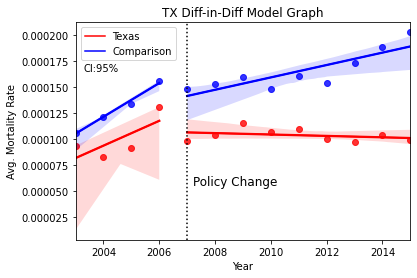

In [11]:
import warnings

warnings.filterwarnings("ignore")

fig, ax = plt.subplots()
# ax.plot(x_pre_tx, y_pre_tx, "o")
m, b = np.polyfit(x_pre_tx, y_pre_tx, 1)
plt.plot(x_pre_tx, m * x_pre_tx + b, color="red")
ax = sns.regplot(x_pre_tx, y_pre_tx, ci=95, color="r")

# ax.plot(x_post_tx, y_post_tx, "o")
m, b = np.polyfit(x_post_tx, y_post_tx, 1)
plt.plot(x_post_tx, m * x_post_tx + b, color="red", label="Texas")
ax = sns.regplot(x_post_tx, y_post_tx, ci=95, color="r")

# ax.plot(x_pre_comp_tx, y_pre_comp_tx, "o")
m, b = np.polyfit(x_pre_comp_tx, y_pre_comp_tx, 1)
plt.plot(x_pre_comp_tx, m * x_pre_comp_tx + b, color="blue")
ax = sns.regplot(x_pre_comp_tx, y_pre_comp_tx, ci=95, color="b")

# ax.plot(x_post_comp_tx, y_post_comp_tx, "o")
m, b = np.polyfit(x_post_comp_tx, y_post_comp_tx, 1)
plt.plot(x_post_comp_tx, m * x_post_comp_tx + b, color="blue", label="Comparison")
ax = sns.regplot(x_post_comp_tx, y_post_comp_tx, ci=95, color="b")

plt.xlabel("Year")
plt.ylabel("Avg. Mortality Rate")
plt.title("TX Diff-in-Diff Model Graph")
plt.axvline(x=2007, color="black", ls=":")
plt.text(2007.2, 0.000055, "Policy Change", fontsize=12)
plt.text(2003.3, 0.000165, "CI:95%", fontsize=10)

plt.legend(loc="best")
plt.show()

#### Washington

In [12]:
# seperate to pre and post policy periods for WA and comparison states (average of OR, CA, NV)

x_pre_wa = np.array(wa_mortality_avg[wa_mortality_avg["Year"] < 2012]["Year"])
y_pre_wa = np.array(wa_mortality_avg[wa_mortality_avg["Year"] < 2012]["Mortality Rate"])
x_post_wa = np.array(wa_mortality_avg[wa_mortality_avg["Year"] >= 2012]["Year"])
y_post_wa = np.array(
    tx_mortality_avg[wa_mortality_avg["Year"] >= 2012]["Mortality Rate"]
)

x_pre_comp_wa = np.array(
    avg_mortality_compare_to_wa[avg_mortality_compare_to_wa["Year"] < 2012]["Year"]
)
y_pre_comp_wa = np.array(
    avg_mortality_compare_to_wa[avg_mortality_compare_to_wa["Year"] < 2012][
        "Avg Mortality Rate"
    ]
)
x_post_comp_wa = np.array(
    avg_mortality_compare_to_wa[avg_mortality_compare_to_wa["Year"] >= 2012]["Year"]
)
y_post_comp_wa = np.array(
    avg_mortality_compare_to_wa[avg_mortality_compare_to_wa["Year"] >= 2012][
        "Avg Mortality Rate"
    ]
)

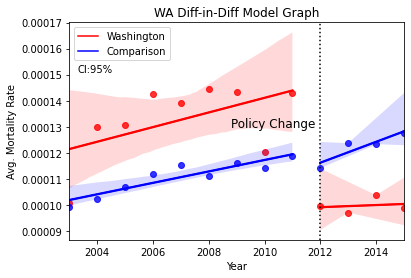

In [13]:
import warnings

warnings.filterwarnings("ignore")

fig, ax = plt.subplots()
# ax.plot(x_pre_wa, y_pre_wa, "o")
m, b = np.polyfit(x_pre_wa, y_pre_wa, 1)
plt.plot(x_pre_wa, m * x_pre_wa + b, color="red")
ax = sns.regplot(x_pre_wa, y_pre_wa, ci=95, color="r")

# ax.plot(x_post_wa, y_post_wa, "o")
m, b = np.polyfit(x_post_wa, y_post_wa, 1)
plt.plot(x_post_wa, m * x_post_wa + b, color="red", label="Washington")
ax = sns.regplot(x_post_wa, y_post_wa, ci=95, color="r")

# ax.plot(x_pre_comp_wa, y_pre_comp_wa, "o")
m, b = np.polyfit(x_pre_comp_wa, y_pre_comp_wa, 1)
plt.plot(x_pre_comp_wa, m * x_pre_comp_wa + b, color="blue")
ax = sns.regplot(x_pre_comp_wa, y_pre_comp_wa, ci=95, color="b")

# ax.plot(x_post_comp_wa, y_post_comp_wa, "o")
m, b = np.polyfit(x_post_comp_wa, y_post_comp_wa, 1)
plt.plot(x_post_comp_wa, m * x_post_comp_wa + b, color="blue", label="Comparison")
ax = sns.regplot(x_post_comp_wa, y_post_comp_wa, ci=95, color="b")

plt.xlabel("Year")
plt.ylabel("Avg. Mortality Rate")
plt.title("WA Diff-in-Diff Model Graph")
plt.axvline(x=2012, color="black", ls=":")
plt.text(2008.8, 0.00013, "Policy Change", fontsize=12)
plt.text(2003.3, 0.000151, "CI:95%", fontsize=10)

plt.legend(loc="best")
plt.show()